# Sprint21 自然言語処理

In [7]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2019-12-26 11:24:58--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu... 171.64.68.10
Connecting to ai.stanford.edu|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: 'aclImdb_v1.tar.gz'

aclImdb_v1.tar.gz   100%[===================>]  80.23M  17.5MB/s    in 6.8s    

2019-12-26 11:25:05 (11.8 MB/s) - 'aclImdb_v1.tar.gz' saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents

In [8]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

print(train_review.target_names)

['neg', 'pos']


In [9]:
print('x : {}'.format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


### **【問題1】BoWのスクラッチ実装**

In [10]:
mini_dataset = ['This movie is very good.', 
               'This film is a good', 
               'Very bad. Very, very bad.']

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()

# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [12]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [151]:
# とりあえず関数で作る

import numpy as np
import re

# 前処理関数
def preprocessing_words(sentence):
    # 'I'や'a'は除外
    ignore_words = ['a', 'I']
    # 英数字以外を文字列から削除する
    words = re.sub(r'\W', ' ', sentence).split()
    #print(words)
    # 除外文字以外の文章中の文字を小文字で統一する
    words_cleaned = [w.lower() for w in words if w not in ignore_words]
    return words_cleaned

def token_sentences(sentences):
    words = []
    for sentence in sentences:
        w = preprocessing_words(sentence)
        words.extend(w)
    
    # abc...順に並び替え、重複を取り除く
    words = sorted(list(set(words)))
    return words

def bow(sentence, words):
    # 前処理する
    sentence_words = preprocessing_words(sentence)
    # words分の文字の空箱を作る
    bag = np.zeros(len(words))
    
    for sw in sentence_words:
        for i, word in enumerate(words):
            #print(word)
            if word == sw:
                bag[i] += 1
                
    return np.array(bag)

In [ ]:
# クラス化する

class BoW:
    def __init__(self, sentence):
        self.sentence = sentence
        
    def preprocessing_words(self, sentence):
        self.sentence = sentence
        ignore_words = ['a', 'I']
        words = re.sub(r'\W', ' ', sentence).split()
        words_cleaned = [w.lower() for w in words if w not in ignore_words]
        return words_cleaned
    
    def token_sentences(self, sentences):
        self.sentences = sentences
        words = []
        for sentence in sentences:
            w = self.preprocessing_words(self.sentence)
            words.extend(w)
            
        words = sorted(list(set(words)))
        return words
    
    def bow(self, sentence, words):
        self.sentence = sentence
        self.words = words
        sentence_words = self.preprocessing(sentence)
        bag = np.zeros(len(words))
        
        for sw in sentence_words:
            for i, word in enumerate(words):
                if word == sw:
                    bag[i] += 1
                    
        return np.array(bag)

In [152]:
preprocessing_words('This movie is SOOOO funny!!!')

['this', 'movie', 'is', 'soooo', 'funny']

In [153]:
sentences = ['This movie is SOOOO funny!!!', 
        'What a movie! I never', 
        'best movie ever!!!!! this movie']

vocabulary = token_sentences(sentences)
print(vocabulary)

['best', 'ever', 'funny', 'is', 'movie', 'never', 'soooo', 'this', 'what']


In [154]:
bow("This movie is SOOOO funny!!!", vocabulary)

array([0., 0., 1., 1., 1., 0., 1., 1., 0.])

## **TF-IDF**

BoWの発展的手法として TF-IDF もよく使われます。これは Term Frequency (TF) と Inverse Document Frequency (IDF) という2つの指標の組み合わせです。

《標準的なTF-IDFの式》

Term Frequency:

t
f
(
t
,
d
)
=
n
t
,
d
∑
s
∈
d
n
s
,
d
n
t
,
d
 : サンプルd内のトークンtの出現回数（BoWと同じ）

∑
s
∈
d
n
s
,
d
 : サンプルdの全トークンの出現回数の和

Inverse Document Frequency:

i
d
f
(
t
)
=
log
N
d
f
(
t
)
N
 : サンプル数

d
f
(
t
)
 : トークンtが出現するサンプル数

＊logの底は任意の値

TF-IDF:

t
f
i
d
f
(
t
,
d
)
=
t
f
(
t
,
d
)
×
i
d
f
(
t
)
IDF
IDFはそのトークンがデータセット内で珍しいほど値が大きくなる指標です。

サンプル数 
N
 をIMDB映画レビューデータセットの訓練用データに合わせ25000として、トークンが出現するサンプル数 
d
f
(
t
)
 を変化させたグラフを確認してみると、次のようになります。

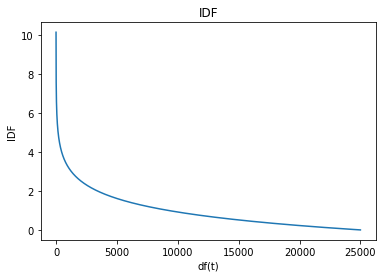

In [14]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1, n_samples))
plt.title('IDF')
plt.xlabel('df(t)')
plt.ylabel('IDF')
plt.plot(idf)
plt.show()

In [15]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [16]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kobayashishintachi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 

In [17]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


### **【問題2】TF-IDFの計算**

IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。

TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。

sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation

sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation

なお、scikit-learnでは標準的な式とは異なる式が採用されています。

また、デフォルトではnorm="l2"の引数が設定されており、各サンプルにL2正規化が行われます。norm=Noneとすることで正規化は行われなくなります。

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['This movie is SOOOO funny!!!', 
         'What a movie! I never', 
         'best movie ever!!!!! this movie']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df)
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '10', '100', '11', '12', '13', '13th', '14', '15', '16', '17', '18', '1930', '1930s', '1933', '1940', '1950', '1950s', '1960', '1960s', '1968', '1970', '1970s', '1971', '1972', '1973', '1980', '1980s', '1983', '1984', '1987', '1990', '1993', '1995', '1996', '1997', '1999', '1st', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '20th', '24', '25', '2nd', '30', '3000', '30s', '35', '3d', '3rd', '40', '45', '50', '50s', '60', '60s', '70', '70s', '80', '80s', '90', '90s', '99', 'abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'act

In [45]:
vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1), token_pattern=r'\b\w+\b', max_features=5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()

In [72]:
bow_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 1), token_pattern=r'\b\w+\b', max_features = 5000)
X_0 = vectorizer.fit_transform(x_train[0:1])
X_0.toarray()

array([[0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.1898316, 0.0949158,
        0.0949158, 0.0949158, 0.3796632, 0.0949158, 0.0949158, 0.0949158,
        0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158,
        0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.1898316, 0.1898316,
        0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158,
        0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158,
        0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.1898316, 0.0949158,
        0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158, 0.0949158,
        0.0949158, 0.1898316, 0.1898316, 0.0949158, 0.1898316, 0.0949158,
        0.2847474, 0.1898316, 0.0949158, 0.0949158, 0.0949158, 0.1898316,
        0.0949158]])

In [70]:
X_1 = vectorizer.fit_transform(x_train[1:2])
X_1.toarray()

array([[0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.26211122, 0.26211122, 0.08737041, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.17474081,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.17474081,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.26211122,
        0.08737041, 0.17474081, 0.08737041, 0.34948162, 0.08737041,
        0.17474081, 0.08737041, 0.17474081, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.17474081, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.17474081, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.08737041, 0.08737041, 0.08737041, 0.08737041, 0.08737041,
        0.08737041]])

### **【問題3】TF-IDFを用いた学習**

問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。

ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [73]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(bow_train, y_train)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
bow_test = (vectorizer.fit_transform(x_test)).toarray()

In [75]:
clf_lr.predict(bow_test)

array([1, 0, 1, ..., 1, 1, 1])

In [77]:
clf_lr.score(bow_train, y_train)

0.96396

In [76]:
clf_lr.score(bow_test, y_test)

0.50148

### **【問題4】TF-IDFのスクラッチ実装**

以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

This movie is SOOOO funny!!!

What a movie! I never

best movie ever!!!!! this movie

In [33]:
import re

class TF_IDF():
    def __init__(self, corpus):
        self.corpus = corpus
        
    def tf(self):
        l = []
        c = []
        
        for text in self.corpus:
            c += re.findall(r'\b\w+\b', text)
            
        c = list(set(c))
        
        for text in self.corpus:
            xxx = re.findall(r'\b\w+\b', text)
            l.append([xxx.count(i)/len(xxx) for i in c])
            
        return np.array(l)
    
    def idf(self):
        terms = []
        
        for text in self.corpus:
            terms += re.findall(r'\b\w+\b', text)
            
        terms = list(set(terms))
        
        l = []
        
        for term in terms:
            c = 0
            
            for text in self.corpus:
                word_list = re.findall(r'\b\w+\b', text)
                if term in word_list:
                    c += 1
                    
            l.append(np.log((1 + len(self.corpus))/(c+1)) + 1)
            
        return np.array(l)
    
    def l2(self, x):
        l2 = x / np.sqrt(np.sum(x**2))
        return l2
    
    def tf_idf(self):
        xxxx = self.tf()*self.idf()
        return np.array([self.l2(a) for a in xxxx])

In [79]:
text = ['This movie is SOOOO funny!!!', 
       'What a movie! I never', 
       'best movie ever!!!!! this movie']

tfidf = TF_IDF(text)
tf_idf_l = tfidf.tf_idf()
print(np.sum(tf_idf_l[0]))
print(np.sum(tf_idf_l[1]))
print(np.sum(tf_idf_l[2]))

2.201328677102573
2.201328677102573
1.9943875510891782


## **Word2Vec**

In [156]:
!pip install gensim

     |████████████████████████████████| 24.7MB 5.4MB/s eta 0:00:011
     |████████████████████████████████| 71kB 5.6MB/s  eta 0:00:01
     |████████████████████████████████| 133kB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 5.9MB 302kB/s eta 0:00:01
     |████████████████████████████████| 71kB 21.6MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.9.0-cp37-none-any.whl size=73088 sha256=770a157ad2fba0b5c053c3466a786ce7b515988e5151fcaf90af308c9a1f6935
  Stored in directory: /Users/kobayashishintachi/Library/Caches/pip/wheels/ab/10/93/5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open


In [158]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], 
            ['this', 'film', 'is', 'a', 'good'], 
            ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)

print('語彙の一覧 : {}'.format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
    print('{}のベクトル : \n{}'.format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.01531005  0.00407166 -0.02160672  0.01519363 -0.00358354  0.01604973
  0.01056968 -0.01470433 -0.02104083  0.02248492]
movieのベクトル : 
[-0.02932659 -0.01235842 -0.03804224 -0.02050768  0.03579145  0.00439456
  0.00426265  0.00416084 -0.04719883  0.04326759]
isのベクトル : 
[-0.00984288  0.00355687 -0.0223916   0.01767082 -0.04615839 -0.01460103
  0.00795622 -0.00398773 -0.03858133 -0.01366398]
veryのベクトル : 
[-0.02018554 -0.00536201 -0.04418946  0.001793   -0.03411289  0.00068759
 -0.01901576 -0.02980644  0.00632628  0.02748958]
goodのベクトル : 
[ 0.0190268   0.00776337  0.03105521  0.01541986  0.01624279  0.01524763
  0.04729545 -0.01795599  0.0125107  -0.0429854 ]
filmのベクトル : 
[-0.01406381  0.01028402 -0.01528296  0.0420459   0.03564008  0.01949245
  0.01976245 -0.028866   -0.02129983 -0.00326809]
aのベクトル : 
[ 0.00186469 -0.02460377  0.00579938 -0.02791781  0.03832477 -0.00730001
 -0.02906983 -0.0028770

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


In [159]:
model.wv.most_similar(positive='good', topn=3)

[('film', 0.35642242431640625),
 ('bad', 0.0629296600818634),
 ('a', -0.1471206396818161)]

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


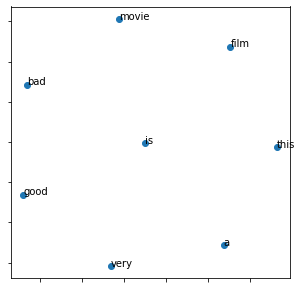

In [161]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### **【問題5】コーパスの前処理**

In [172]:
len(x_train)

25000

In [175]:
words_clean = []
for i in range(len(x_train)):
    words = re.sub(r'\W', ' ', x_train[i]).split()
    words_cleaned = [w.lower() for w in words]
    words_clean.append(words_cleaned)

In [179]:
# words_0 = re.sub(r'\W', ' ', x_train[0]).split()
# words_cleaned_0 = [w.lower() for w in words_0]
# words_cleaned_0

In [177]:
words_cleaned

['absolutely',
 'the',
 'worst',
 'film',
 'yet',
 'by',
 'burton',
 'who',
 'seems',
 'to',
 'be',
 'getting',
 'worse',
 'with',
 'each',
 'film',
 'he',
 'directs',
 'a',
 'miserable',
 'script',
 'loaded',
 'with',
 'cliches',
 'is',
 'only',
 'the',
 'first',
 'of',
 'many',
 'objectionable',
 'aspects',
 'to',
 'this',
 'film',
 'this',
 'is',
 'the',
 'kind',
 'of',
 'movie',
 'where',
 'every',
 'time',
 'something',
 'happens',
 'you',
 'll',
 'be',
 'sure',
 'to',
 'hear',
 'someone',
 'shout',
 'out',
 'he',
 's',
 'lost',
 'his',
 'gun',
 'or',
 'whatever',
 'it',
 'is',
 'to',
 'let',
 'everybody',
 'know',
 'carter',
 'is',
 'really',
 'awful',
 'and',
 'so',
 'is',
 'wahlberg',
 'who',
 'can',
 't',
 'play',
 'this',
 'straight',
 'and',
 'be',
 'convincing',
 'very',
 'nice',
 'effects',
 'and',
 'photography',
 'but',
 'poor',
 'music',
 'in',
 'the',
 'john',
 'williams',
 'mold',
 'by',
 'burton',
 's',
 'crony',
 'elfman',
 'heston',
 'appears',
 'in',
 'a',
 'nonse

### **【問題6】Word2Vecの学習**

In [181]:
from gensim.models import Word2Vec
sentences = x_train
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


(36005266, 165633705)